In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')
%matplotlib inline

# Finding patterns in the data
In this notebook we will try to extract words that have time series with interesting properties.

In [2]:
wordYear = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
print('Shape : ',wordYear.shape)
wordYear.head()

Shape :  (197, 43051)


,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-01-01,0.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0
1799-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
1804-01-01,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,2.0,0.0,18.0,5.0,0.0,0.0
1805-01-01,0.0,4.0,9.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,4.0
1806-01-01,3.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0


We also have to keep the data until 1997, because for 1998 we only have too months, therefore we cannot compre the data for this year with the other years.

In [3]:
wordYear = wordYear.loc[wordYear.index[:-1]]
wordYear.shape

(196, 43051)

First we will keep only time series that have sufficient datapoints to create smooth functions from which to choose interesting ones. If we analyze sparse time series, we will get results that are not consistent  with what we are looking for.

We choose to keep times series tht have more than 40 time points.

In [4]:
numOccurences = wordYear.astype(bool).sum(axis=0).values

In [5]:
fullYear = wordYear[wordYear.columns[numOccurences>40]]
index = fullYear.index
fullYear.shape

(196, 12883)

We also have to be working in normalized data so that we can identify increase in usage.

In [355]:
fullYearNorm = fullYear.divide(fullYear.sum(axis=1).values,axis=0)

And we will also smooth the data.

In [356]:
fullYear.head()

,aarau,abaisser,abandon,abandonner,abattoir,abattre,abattue,abbaye,abbott,abbé,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
1798-01-01,0.0,0.0,7.0,42.0,0.0,4.0,0.0,40.0,0.0,12.0,...,0.0,0.0,1928.0,10.0,10.0,0.0,0.0,10.0,0.0,4.0
1799-01-01,0.0,0.0,3.0,130.0,0.0,4.0,7.0,43.0,0.0,4.0,...,0.0,0.0,2292.0,138.0,4.0,0.0,0.0,16.0,0.0,6.0
1804-01-01,0.0,0.0,4.0,40.0,0.0,0.0,0.0,22.0,0.0,16.0,...,0.0,0.0,1756.0,108.0,3.0,0.0,0.0,15.0,2.0,18.0
1805-01-01,0.0,0.0,6.0,60.0,0.0,0.0,0.0,66.0,0.0,42.0,...,0.0,0.0,1995.0,149.0,3.0,0.0,0.0,6.0,0.0,16.0
1806-01-01,0.0,0.0,0.0,38.0,0.0,0.0,0.0,36.0,0.0,7.0,...,0.0,0.0,2131.0,176.0,0.0,0.0,0.0,37.0,0.0,26.0


In [357]:
fullYear = fullYear.rolling(window=3).mean()

### Finding increasing time series
To find a time serie that increases over time we will compte the gradient of each time series. Then we will sum the total gradient and we can assume that the time series with highest total gradient will be the ones that increase the most overthe years.

In [6]:
totGrad = fullYear.apply(np.gradient).sum()
Grad = fullYear.apply(np.gradient)

In [7]:
wordsIncrease = totGrad.sort_values(ascending=False).index[10:20]

We plot here the first ten words with max increasing gradient.

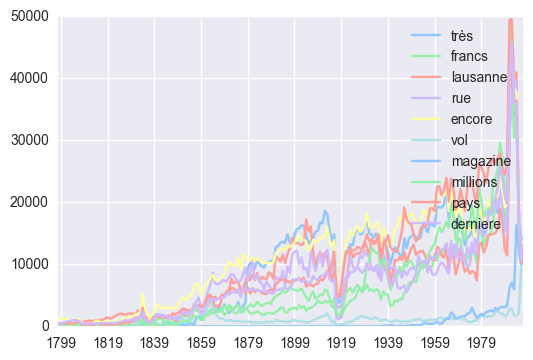

In [8]:
for i in wordsIncrease[0:10]:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

Let's look at words where the time serie is always increasing (gradient always positive).

In [361]:
columnName = fullYear.columns.values
GradPos = Grad[Grad>0]
allPos = GradPos.fillna(0).astype(bool).sum(axis=0).sort_values(ascending=False).index[:10]
allPos

Index(['selon', 'permettre', 'face', 'lors', 'début', 'deuxième', 'peu',
       'notamment', 'réussir', 'monde'],
      dtype='object')

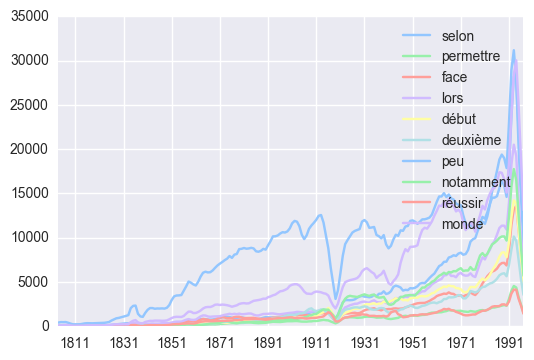

In [362]:
for i in allPos:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

### Finding decreasing time series
For this we will do the same thing but the other way round.

In [425]:
wordsDecrease = totGrad.sort_values().index[0:20]
wordsDecrease

Index(['coul', 'fur', 'news', 'fon', 'fes', 'directoire', 'fous', 'fans',
       'citoyen', 'feront', 'empereur', 'tems', 'ennemie', 'cit', 'sénat',
       'décret', 'troupes', 'officier', 'casque', 'bulletin'],
      dtype='object')

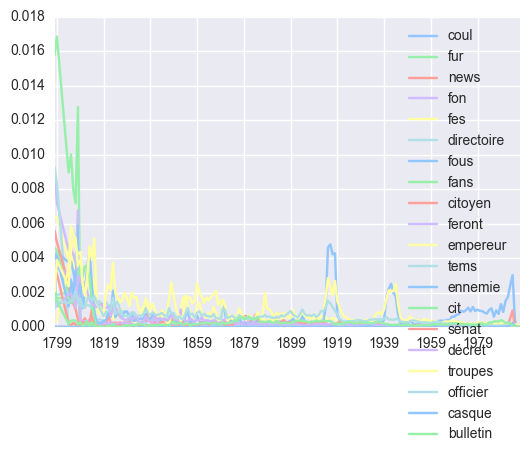

In [427]:
for i in wordsDecrease:
    plt.plot_date(index,fullYearNorm[i].values,'-',label=i)
plt.legend()

We can also look at time series where the gradient is always decreasing.

In [365]:
GradNeg = Grad[Grad<0]
AllPosNeg = GradNeg.fillna(0).astype(bool).sum(axis=0).sort_values(ascending=False).index[:10]
AllPosNeg

Index(['pay', 'ports', 'perfection', 'allier', 'empereur', 'arm', 'turquie',
       'impératrice', 'russie', 'attach'],
      dtype='object')

### Finding words that stay constant

We want to find words whoe usage stay sort of constant over time.

In [376]:
gradConst = Grad[Grad>-2][Grad <2].fillna(0).astype(bool).sum(axis=0).sort_values(ascending=False)

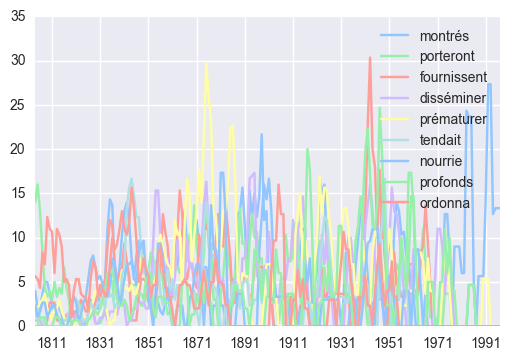

In [377]:
for i in gradConst.index[1:10]:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

We were not able to find stable time series exept for the ones that had a lot of zeros, so this did not help us for interesting visualizations.

### Finding correlated time series

We are interested in time series that are similar between themselves. For that wee look at the Pearson correlation coefficient between time series

In [9]:
fullYear.fillna(0,inplace=True)
fullYearNorm = fullYear.divide(fullYear.sum(axis=1),axis=0)

/Users/thomas/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [10]:
np.corrcoef(fullYearNorm.aarau,fullYear.aarau)

array([[ 1.        ,  0.80017516],
       [ 0.80017516,  1.        ]])

In [11]:
PearsonCorr = fullYear.corr()
PearsonCorr.head()

,aarau,abaisser,abandon,abandonner,abattoir,abattre,abattue,abbaye,abbott,abbé,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
aarau,1.000000,0.442898,0.543565,0.684115,0.258570,0.047459,0.122201,0.305491,0.242284,0.390625,...,-0.170078,0.093790,0.677555,0.537657,-0.326961,-0.067525,0.282675,0.621550,0.400121,0.655375
abaisser,0.442898,1.000000,0.458444,0.417859,-0.025765,-0.121744,-0.047451,0.077841,0.291901,0.047923,...,-0.100766,0.072069,0.492300,0.297969,-0.177026,0.025083,0.238097,0.432866,0.372474,0.437550
abandon,0.543565,0.458444,1.000000,0.708715,0.066775,0.016621,0.183897,0.036423,0.763317,0.004676,...,-0.271310,0.101208,0.878118,0.552143,-0.300498,-0.177999,0.755366,0.876342,0.536819,0.874319
abandonner,0.684115,0.417859,0.708715,1.000000,0.229736,0.317863,0.308369,0.316246,0.320693,0.453197,...,-0.187873,0.166049,0.892717,0.759918,-0.375420,-0.044572,0.431999,0.807565,0.563154,0.860366
abattoir,0.258570,-0.025765,0.066775,0.229736,1.000000,0.074303,0.189514,0.242309,0.007377,0.266435,...,-0.060274,-0.077233,0.189293,0.323311,-0.150207,0.106554,-0.065307,0.202553,0.095550,0.147508


We select for words pairs with very high Pearson correlation.

In [278]:
highPear = fullYear.columns[(PearsonCorr > 0.9).sum(axis=1)>10]

In [279]:
highPear

Index(['abbott', 'aboutir', 'abram', 'accent', 'accord', 'accorder', 'accords',
       'accoutumer', 'accroiss', 'accroître',
       ...
       'évaluation', 'éveiller', 'éventuel', 'éventuelle', 'évidence',
       'évoluer', 'évolution', 'êlre', 'œcuménique', 'œuvre'],
      dtype='object', length=1646)

Here we can try which words are correlated with themselves.

In [341]:
wordInGroup = 'aubergiste'
otherWords = PearsonCorr.columns[PearsonCorr.loc[wordInGroup] > 0.85]

In [342]:
otherWords

Index(['agissante', 'allaman', 'aubergiste', 'avis', 'consistant',
       'consternation', 'contenance', 'contenant', 'district', 'domicilier',
       'exposeront', 'galetas', 'grandvaux', 'guex', 'juge', 'masse', 'pinter',
       'prescrite', 'pressoire', 'présumer', 'remontrance', 'renseignemens',
       'régens', 'sentimen', 'sieur', 'situer', 'soumissions', 'soussigner',
       'suivan', 'syndic', 'vase', 'établissemen'],
      dtype='object')

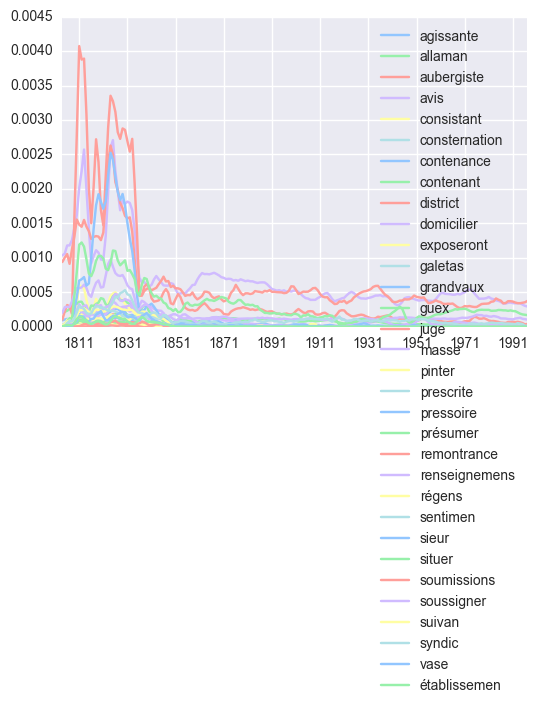

In [343]:
for i in otherWords:
    plt.plot_date(index,fullYearNorm[i].values,'-',
            label=i)

plt.legend()

### Correlation with periodic words.
We are also interested to find words with a monthly periodicity, for this we want to see which time series correlate with the time serie of 'Noël' or 'Olympique' as they were already found to have periodicity for example.

We can also use this technique to match know curve shapes with other words.

In [384]:
wordMonth = pd.read_csv('Data/3kplusWordMonth.csv',index_col=0)
wordMonth.shape

(2351, 43051)

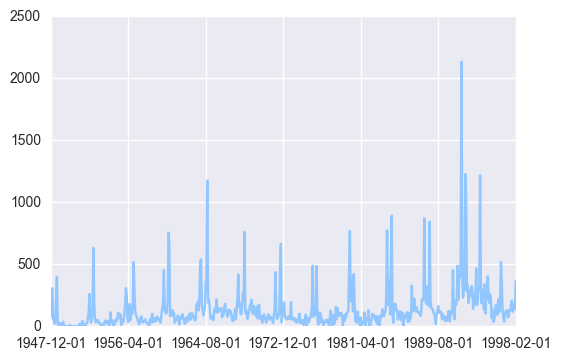

In [408]:
wordMonth['olympique'][1750:].plot()

In [409]:
wordMonthSmall = wordMonth.loc[wordMonth.index[1750:]]
smallCorr = wordMonthSmall.corr()

In [457]:
small = smallCorr.columns[smallCorr['aubergiste']>0.6]
small

Index(['aubergiste', 'coche', 'cordiaux', 'cuno', 'eplattenier', 'gascon',
       'immortelle', 'modique', 'muguet', 'ochsenbein', 'oisif',
       'qénéral-dufour', 'saint-denis', 'ériger'],
      dtype='object')

In [449]:
columnName

array(['aarau', 'abaisser', 'abandon', ..., 'œil', 'œuf', 'œuvre'], dtype=object)

### All the most present words
Let's look at the frequency evolution of the mos present words in the dataset.

In [28]:
maxWords = fullYearNorm.sum(axis=0).sort_values(ascending=False).index[0:15]

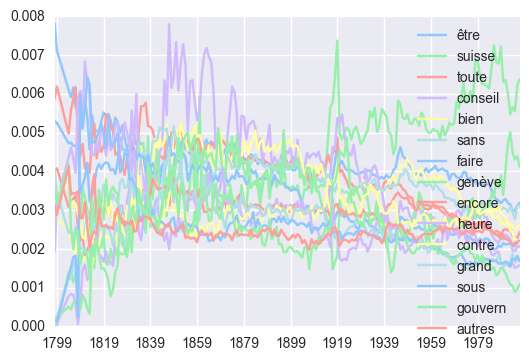

In [29]:
for maximum in maxWords:
    plt.plot_date(index,fullYearNorm[maximum].values,'-',label=maximum)

plt.legend()

We see that this does not give interesting results.

### Dendogram Clustering

We try here a dendogran clustering of the time serie, based on correlation distance to try and find word clusters.

In [439]:
import scipy.cluster.hierarchy as hac

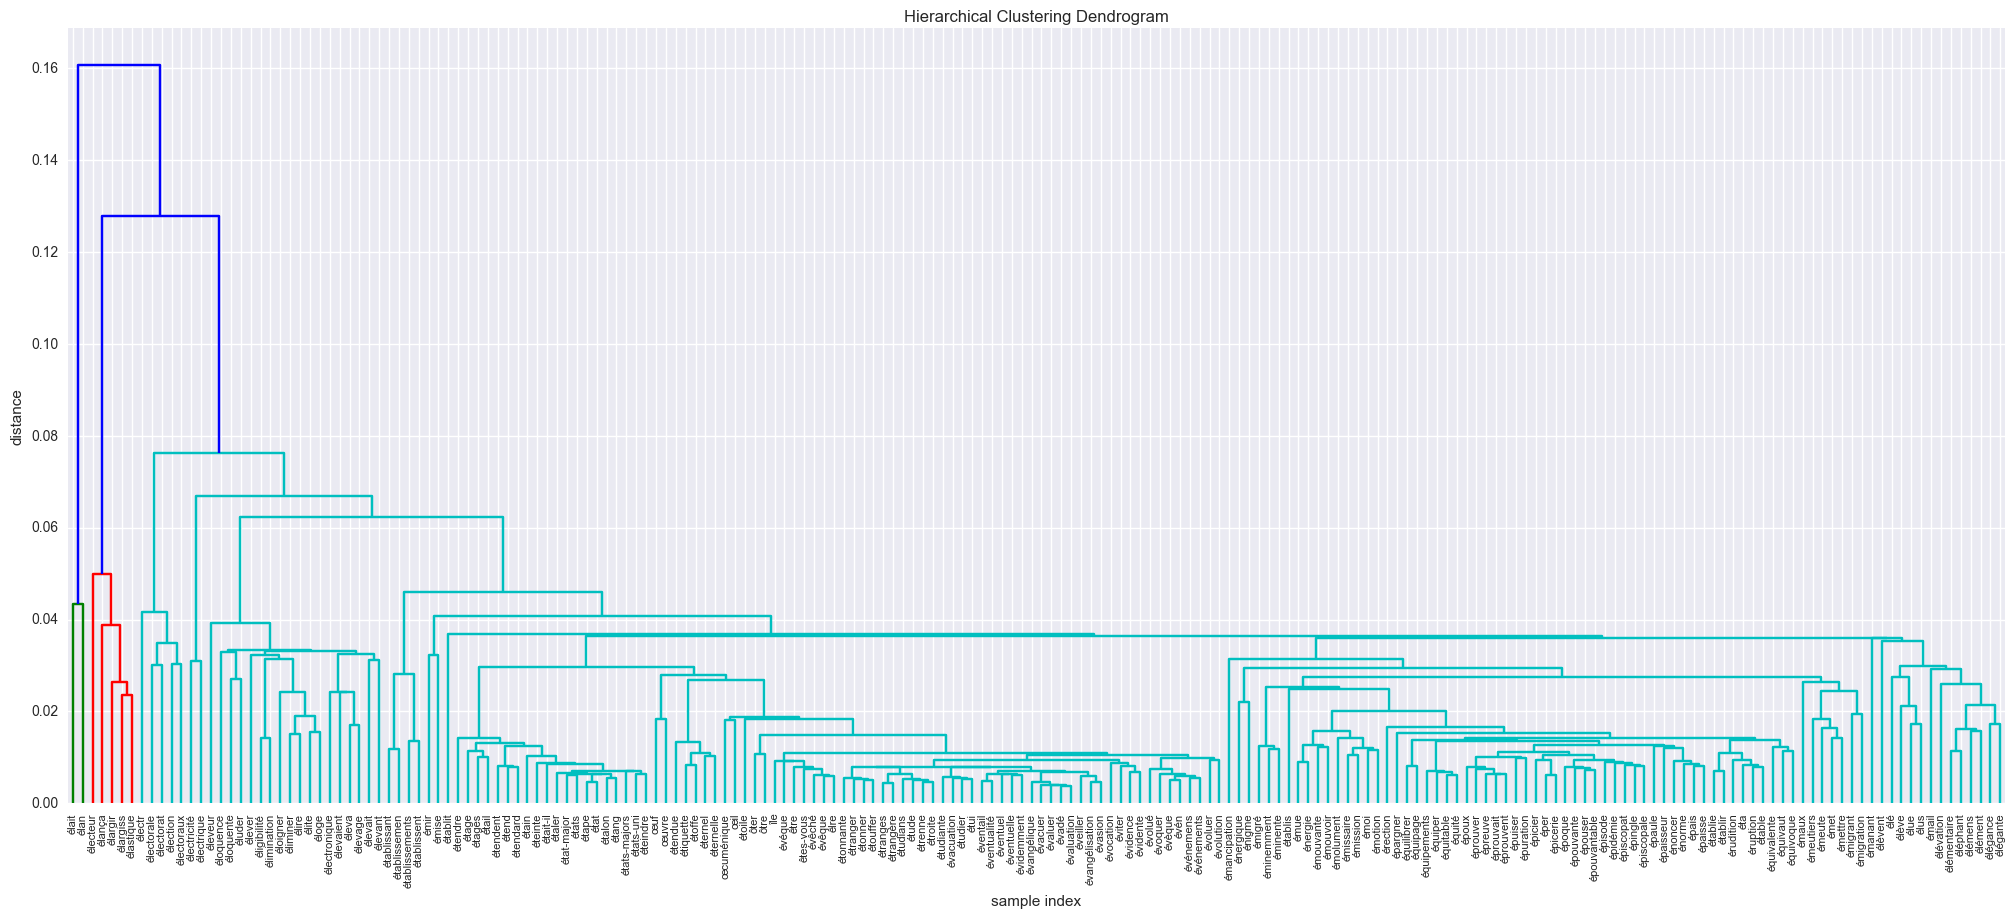

In [36]:
Z = hac.linkage(fullYearNorm, 'single', 'correlation')

# Plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    labels=fullYearNorm.columns.values# font size for the x axis labels
)
plt.show()

We see that we have too many words for any interesting results to be found from this dendogram.

Let's do a dendogram for the 100 most frequent words!

In [441]:
maxWords = fullYearNorm.sum(axis=0).sort_values(ascending=False).index[0:50]

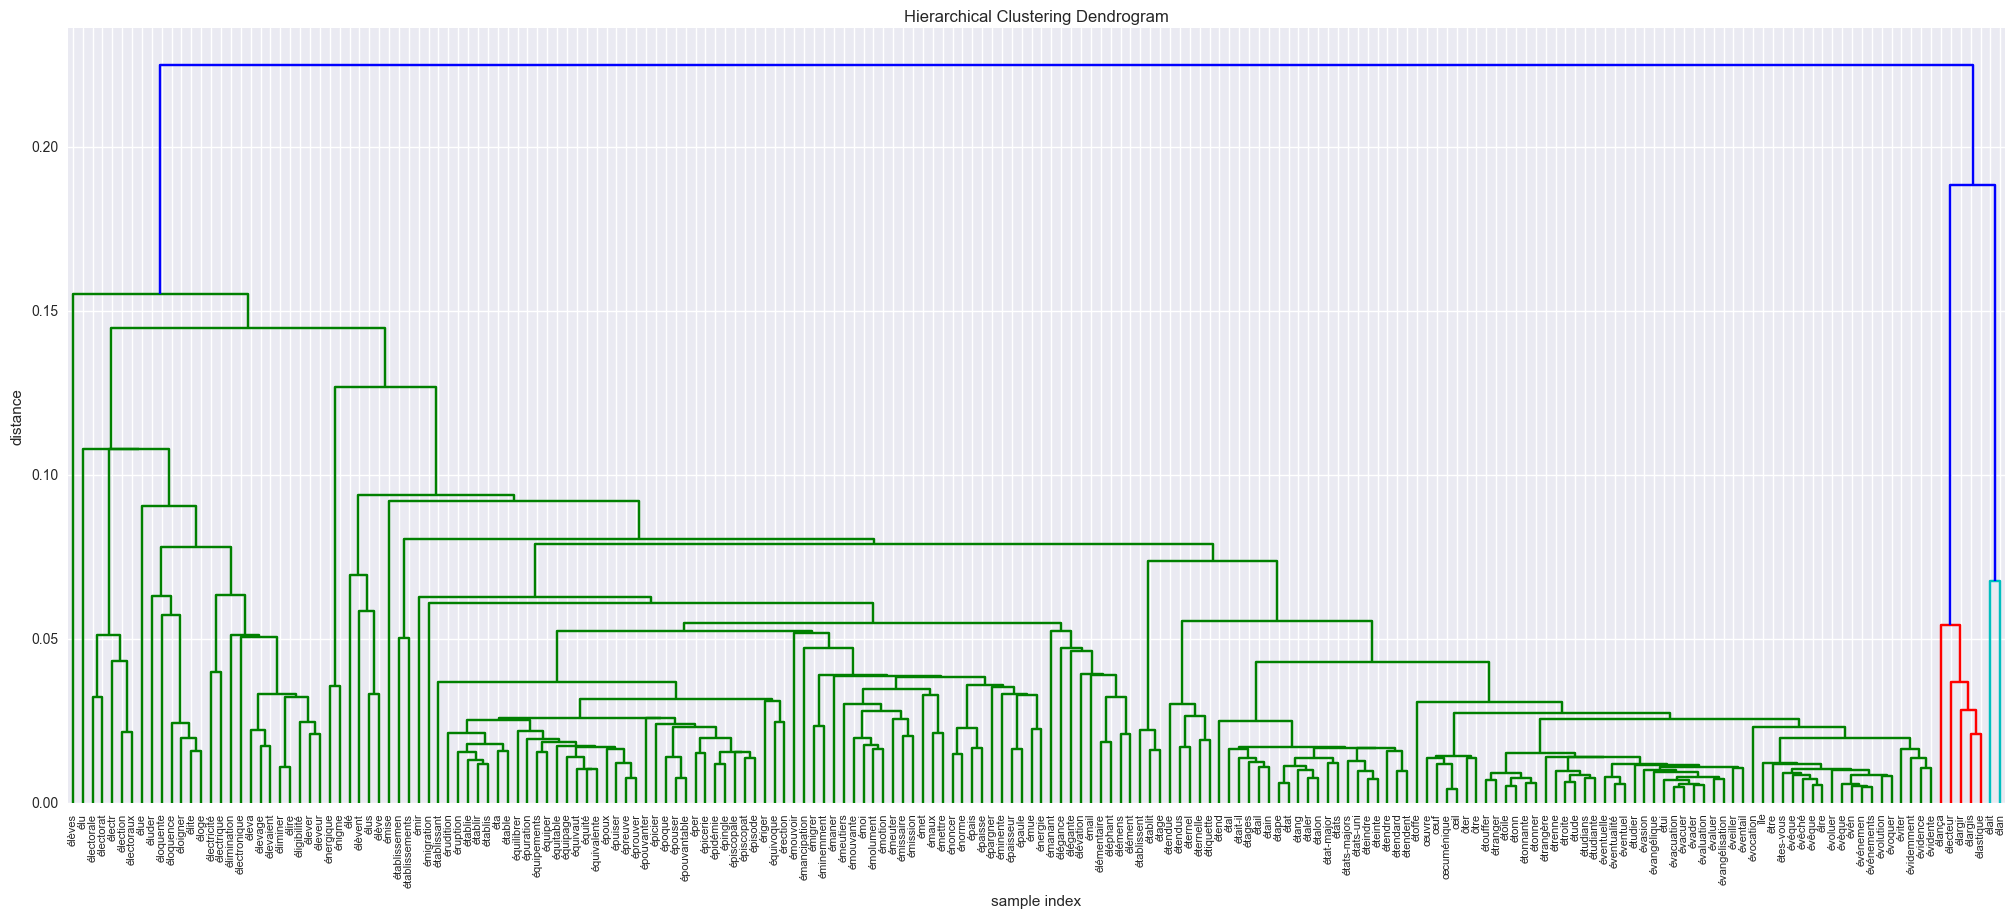

In [446]:
Z = hac.linkage(fullYearNorm[maxWords], 'single', 'correlation')

# Plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    labels=fullYearNorm.columns.values# font size for the x axis labels
)
plt.show()

The result of the dendogram method is very interesting but we can see that it does not bring a lot of information as we try to analyze too many words.

# Finding words with frequencies

We will try to find words that have a yearly cycle. We will try to automatically find those by using the Fourier Transform (it will have a peak associated with its frequency).

In [25]:
wordMonth = pd.read_csv('Data/3kplusWordMonth.csv',index_col=0)
wordMonth.shape

(2351, 43051)

In [26]:
wordNorm = wordMonth.divide(wordMonth.sum(axis=1).values,axis=0)
wordNorm.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-02-01,0.0,0.0,0.000000,0.0,0.000076,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,0.0,0.000159,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import scipy.fftpack as sc

In [50]:
noel = wordNorm['noële'].values[1500:1950]

In [32]:
wordMonth.index = pd.to_datetime(wordMonth.index)
yearIndex = wordNorm.index

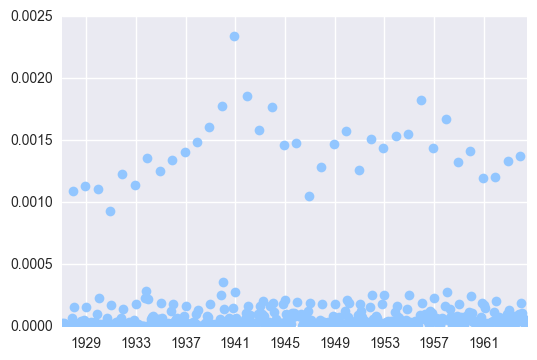

In [51]:
plt.plot_date(yearIndex[1500:1950],noel)

/Users/thomas/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


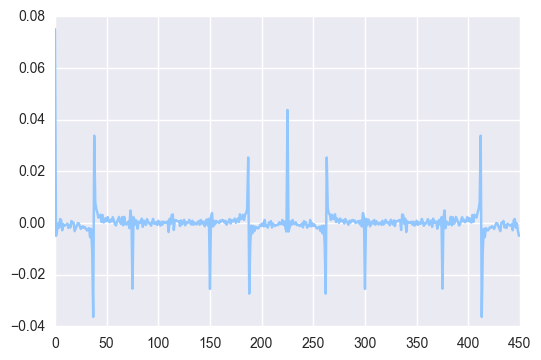

In [52]:
plt.plot(sc.fft(noel))

We indeed see that the method displays peaks, but the results are very noisy and it is not easy to automatically extrapolate which words will have an interesting periodicity.

We will not use Fourier analysis to find periodic words.


We have tried several methods and report the most interesting results in the [visualizations](https://github.com/ThomVett/Project_ADA/blob/master/Visualizations.ipynb) notebook